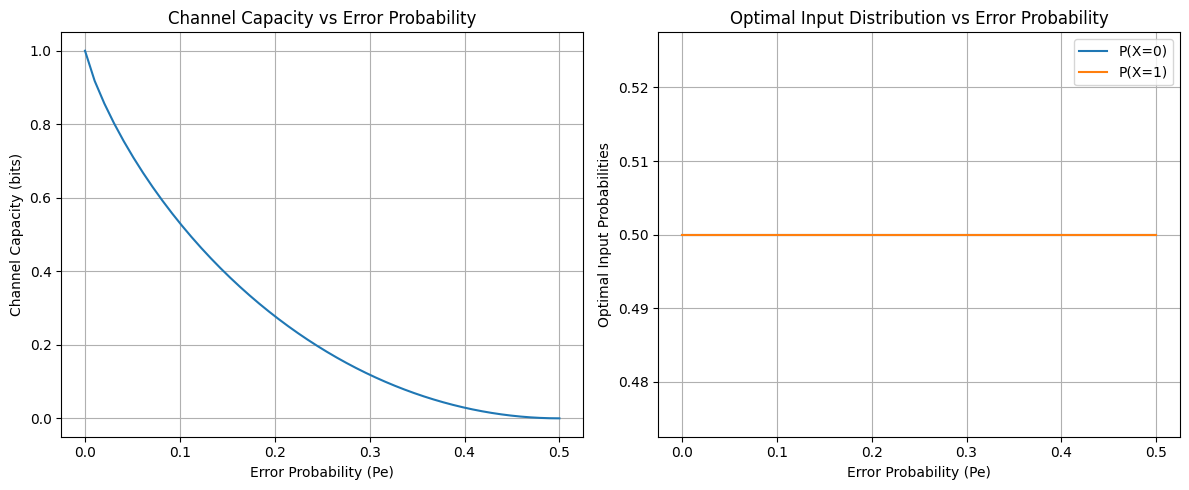


Channel Capacity Examples:
Pe	Capacity	Optimal P(X=0)
----------------------------------------
0.0	1.0000	0.5000
0.1	0.5310	0.5000
0.2	0.2781	0.5000
0.3	0.1187	0.5000
0.4	0.0290	0.5000
0.5	0.0000	0.5000


In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def calculate_joint_matrix(px0, pe):
    """
    Calculate the joint probability matrix P(X,Y) for a BSC.

    Parameters:
    px0: probability of sending X=0
    pe: channel error probability

    Returns:
    2x2 joint probability matrix
    """
    px1 = 1 - px0  # probability of sending X=1

    # Create joint probability matrix
    # [[P(X=0,Y=0)  P(X=0,Y=1)]
    #  [P(X=1,Y=0)  P(X=1,Y=1)]]
    return np.array([
        [px0 * (1-pe), px0 * pe],
        [px1 * pe, px1 * (1-pe)]
    ])

def calculate_mutual_information(px0, pe):
    """
    Calculate I(X;Y) for given input probability and error probability.

    Parameters:
    px0: probability of sending X=0
    pe: channel error probability

    Returns:
    Mutual information I(X;Y) in bits
    """
    # Input entropy H(X)
    px1 = 1 - px0
    hx = 0
    if 0 < px0 < 1:  # Avoid log(0)
        hx = -px0 * np.log2(px0) - px1 * np.log2(px1)

    # Get joint probability matrix
    joint_matrix = calculate_joint_matrix(px0, pe)

    # Calculate P(Y) by summing columns
    py = np.sum(joint_matrix, axis=0)

    # Calculate conditional probabilities P(X|Y)
    conditional_probs = joint_matrix / py

    # Calculate H(X|Y)
    hx_given_y = 0
    for j in range(2):
        for i in range(2):
            if joint_matrix[i,j] > 0:  # Avoid log(0)
                hx_given_y -= joint_matrix[i,j] * np.log2(conditional_probs[i,j])

    return hx - hx_given_y

def find_channel_capacity(pe):
    """
    Find the channel capacity and optimal input distribution for given error probability.

    Parameters:
    pe: channel error probability

    Returns:
    (capacity, optimal_px0)
    """
    # Negative mutual information for minimization
    def objective(px0):
        return -calculate_mutual_information(px0[0], pe)

    # Optimize over px0 in [0,1]
    result = minimize(objective, x0=[0.5], bounds=[(0, 1)])
    optimal_px0 = result.x[0]
    capacity = -result.fun  # Convert back to positive

    return capacity, optimal_px0

# Example calculation and visualization
if __name__ == "__main__":
    # Calculate capacity for different error probabilities
    pe_values = np.linspace(0, 0.5, 50)
    capacities = []
    optimal_px0s = []

    for pe in pe_values:
        capacity, optimal_px0 = find_channel_capacity(pe)
        capacities.append(capacity)
        optimal_px0s.append(optimal_px0)

    # Plot results
    plt.figure(figsize=(12, 5))

    # Plot capacity vs Pe
    plt.subplot(1, 2, 1)
    plt.plot(pe_values, capacities)
    plt.grid(True)
    plt.xlabel('Error Probability (Pe)')
    plt.ylabel('Channel Capacity (bits)')
    plt.title('Channel Capacity vs Error Probability')

    # Plot optimal input distribution vs Pe
    plt.subplot(1, 2, 2)
    plt.plot(pe_values, optimal_px0s, label='P(X=0)')
    plt.plot(pe_values, 1-np.array(optimal_px0s), label='P(X=1)')
    plt.grid(True)
    plt.xlabel('Error Probability (Pe)')
    plt.ylabel('Optimal Input Probabilities')
    plt.title('Optimal Input Distribution vs Error Probability')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print some specific examples
    test_pe_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
    print("\nChannel Capacity Examples:")
    print("Pe\tCapacity\tOptimal P(X=0)")
    print("-" * 40)
    for pe in test_pe_values:
        capacity, optimal_px0 = find_channel_capacity(pe)
        print(f"{pe:.1f}\t{capacity:.4f}\t{optimal_px0:.4f}")